# Exploratory Data Analysis (EDA) für den Twitter Bot Detection Datensatz

Dieses Notebook führt eine umfassende EDA durch. Es umfasst:
- Überblick über den Datensatz und seine Struktur
- Analyse von fehlenden Werten
- Univariate und bivariate Analysen numerischer und kategorialer Variablen
- Zeitreihenanalyse basierend auf dem Erstellungsdatum der Tweets
- Textanalyse mittels Word Cloud
- Analyse der Hashtags
- spaCy-basierte linguistische Analyse (Named Entity Recognition und Part-of-Speech-Analyse)

**Spalten im Datensatz:**
- **User ID**: Eindeutige Kennung jedes Nutzers.
- **Username**: Der Nutzername des Users.
- **Tweet**: Der Textinhalt des Tweets.
- **Retweet Count**: Anzahl der Retweets.
- **Mention Count**: Anzahl der Erwähnungen.
- **Follower Count**: Anzahl der Follower des Nutzers.
- **Verified**: Boolean, ob der Nutzer verifiziert ist.
- **Bot Label**: Kennzeichnung, ob es sich um einen Bot handelt (1) oder nicht (0).
- **Location**: Der Standort des Nutzers.
- **Created At**: Datum und Uhrzeit, wann der Tweet erstellt wurde.
- **Hashtags**: Die im Tweet verwendeten Hashtags.

### 1. Daten Laden und Überblick

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Für ansprechende Visualisierungen
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# Dataset laden – passe den Pfad/Dateinamen ggf. an!
df = pd.read_csv(r"C:\Users\uhumb\Desktop\BotDetectionProject\data\twitter_dataset.csv")

# Ersten Einblick in den Datensatz
print("Erste 5 Zeilen des Datensatzes:")
print(df.head())
print("\nDatensatzform (Zeilen, Spalten):", df.shape)

Erste 5 Zeilen des Datensatzes:
   User ID        Username                                              Tweet  \
0   132131           flong  Station activity person against natural majori...   
1   289683  hinesstephanie  Authority research natural life material staff...   
2   779715      roberttran  Manage whose quickly especially foot none to g...   
3   696168          pmason  Just cover eight opportunity strong policy which.   
4   704441          noah87                      Animal sign six data good or.   

   Retweet Count  Mention Count  Follower Count  Verified  Bot Label  \
0             85              1            2353     False          1   
1             55              5            9617      True          0   
2              6              2            4363      True          0   
3             54              5            2242      True          1   
4             26              3            8438     False          1   

       Location           Created At            

### 2. Überblick & Datentypen

In [3]:
print("\nInformationen zum Datensatz:")
print(df.info())


Informationen zum Datensatz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB
None


### 3. Deskriptive Statistiken

In [4]:
print("\nDeskriptive Statistiken (numerische Features):")
print(df.describe())


Deskriptive Statistiken (numerische Features):
             User ID  Retweet Count  Mention Count  Follower Count  \
count   50000.000000    50000.00000   50000.000000    50000.000000   
mean   548890.680540       50.00560       2.513760     4988.602380   
std    259756.681425       29.18116       1.708563     2878.742898   
min    100025.000000        0.00000       0.000000        0.000000   
25%    323524.250000       25.00000       1.000000     2487.750000   
50%    548147.000000       50.00000       3.000000     4991.500000   
75%    772983.000000       75.00000       4.000000     7471.000000   
max    999995.000000      100.00000       5.000000    10000.000000   

          Bot Label  
count  50000.000000  
mean       0.500360  
std        0.500005  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


### 4. Analyse fehlender Werte

In [5]:
print("\nAnzahl fehlender Werte pro Spalte:")
print(df.isnull().sum())


Anzahl fehlender Werte pro Spalte:
User ID              0
Username             0
Tweet                0
Retweet Count        0
Mention Count        0
Follower Count       0
Verified             0
Bot Label            0
Location             0
Created At           0
Hashtags          8341
dtype: int64


### 5. Univariate Analyse – Numerische Features

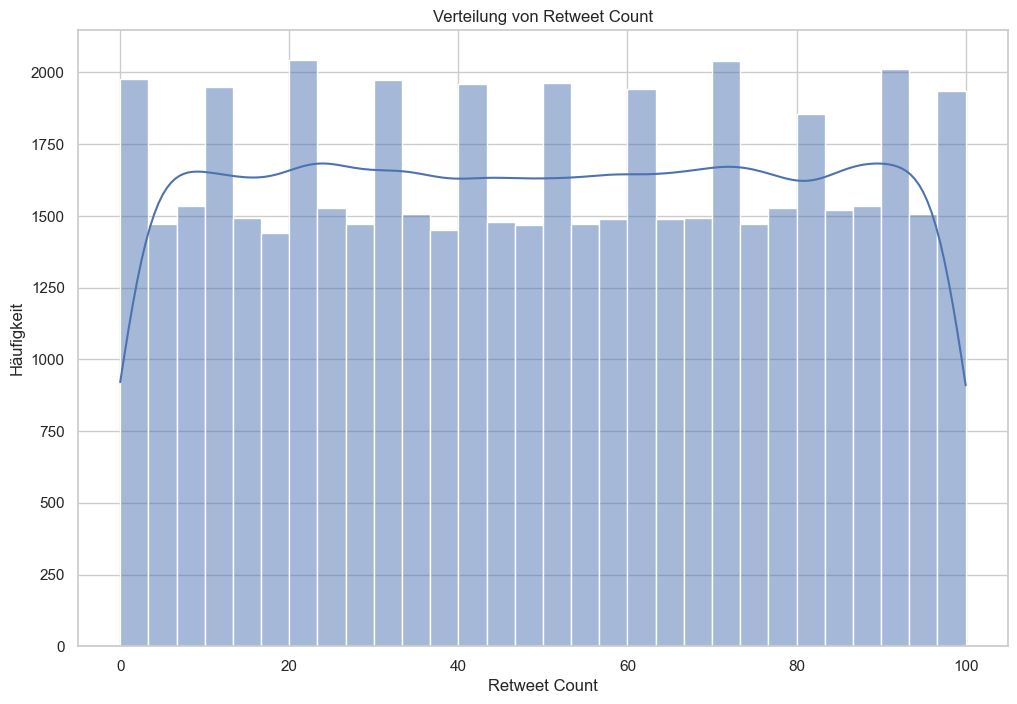

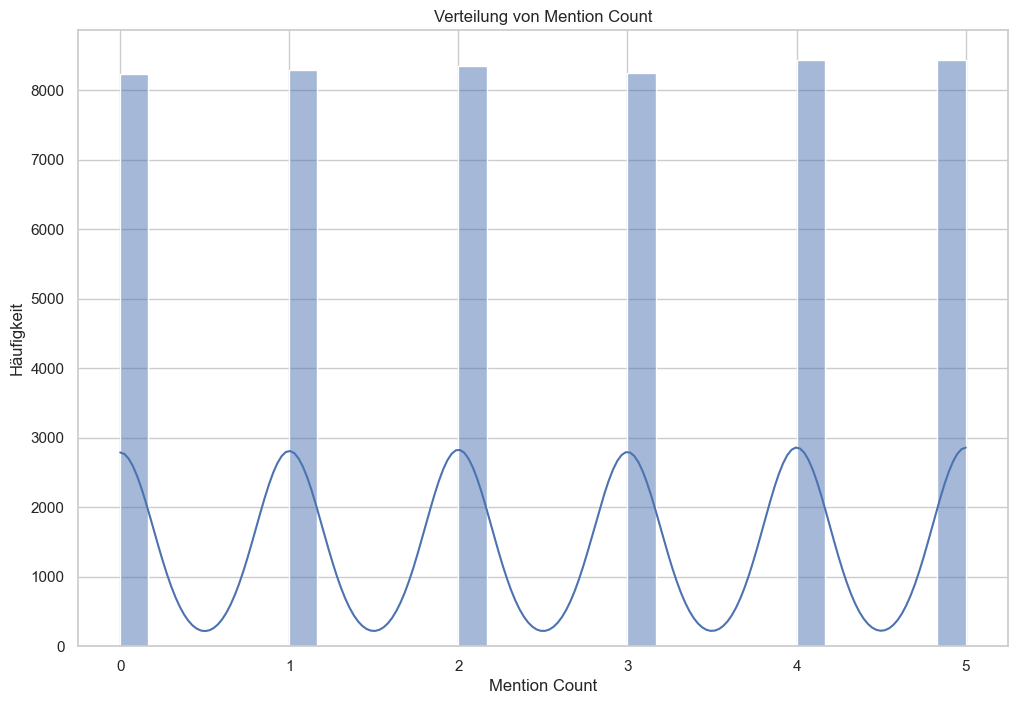

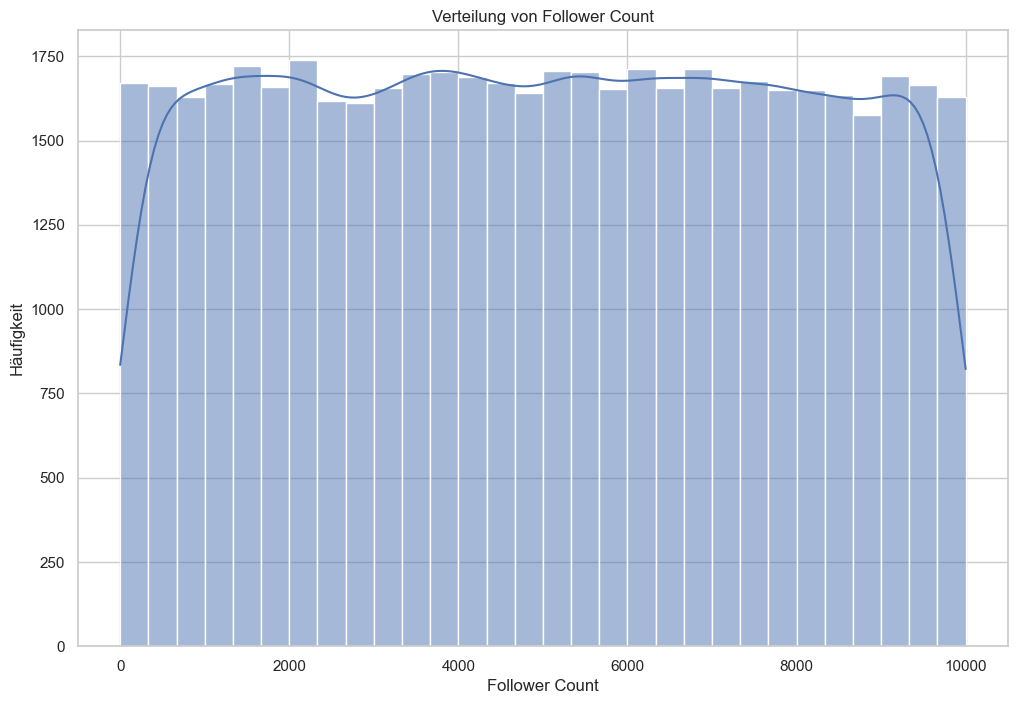

In [7]:
numerical_cols = ["Retweet Count", "Mention Count", "Follower Count"]

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Verteilung von {col}")
    plt.xlabel(col)
    plt.ylabel("Häufigkeit")
    plt.show()


#### Analyse kategorialer Variablen

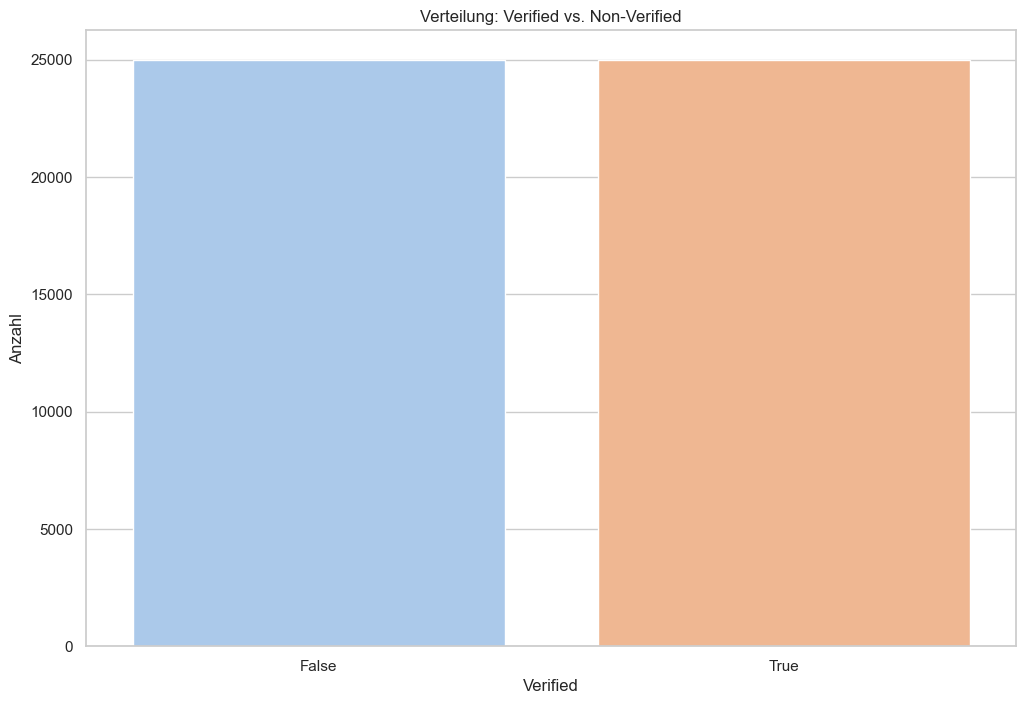

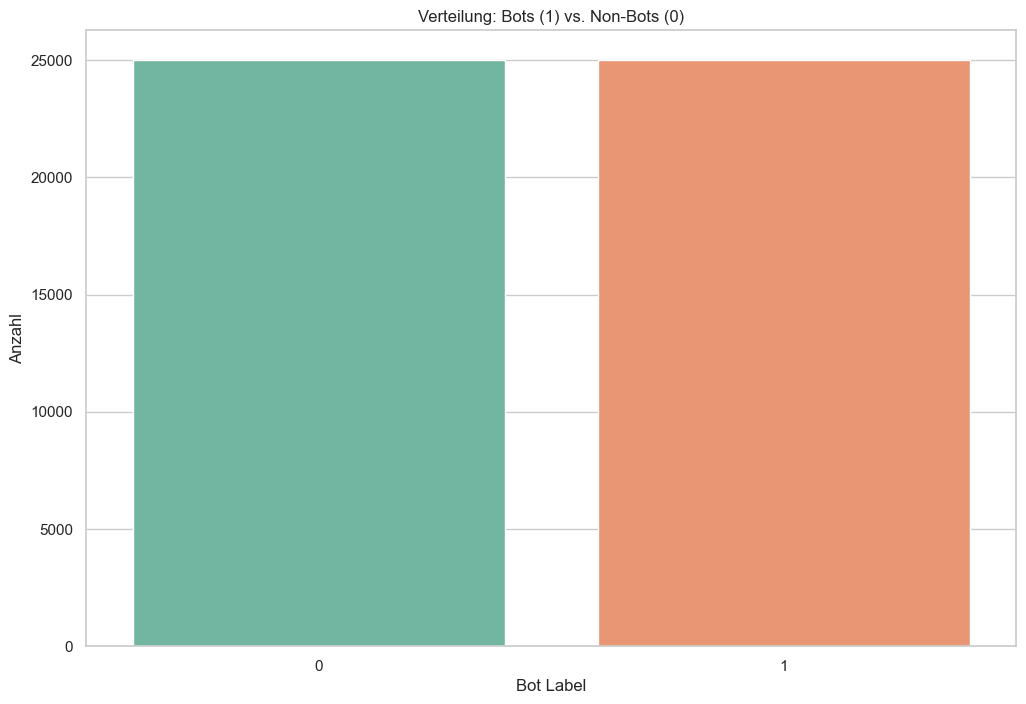

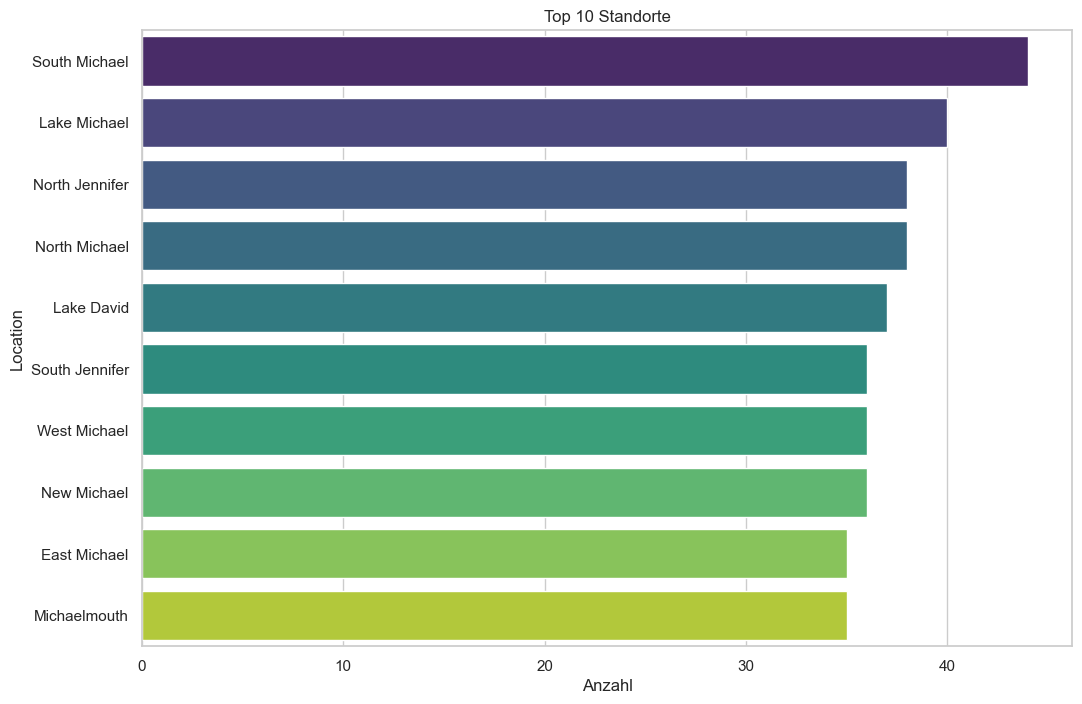

In [8]:
# Verteilung des 'Verified'-Status
plt.figure()
sns.countplot(x="Verified", data=df, palette="pastel")
plt.title("Verteilung: Verified vs. Non-Verified")
plt.xlabel("Verified")
plt.ylabel("Anzahl")
plt.show()

# Verteilung des Bot Labels
plt.figure()
sns.countplot(x="Bot Label", data=df, palette="Set2")
plt.title("Verteilung: Bots (1) vs. Non-Bots (0)")
plt.xlabel("Bot Label")
plt.ylabel("Anzahl")
plt.show()

# Top 10 der häufigsten Standorte
plt.figure()
top_locations = df["Location"].value_counts().nlargest(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")
plt.title("Top 10 Standorte")
plt.xlabel("Anzahl")
plt.ylabel("Location")
plt.show()

### 6. Bivariate Analyse & Korrelationsmatrix

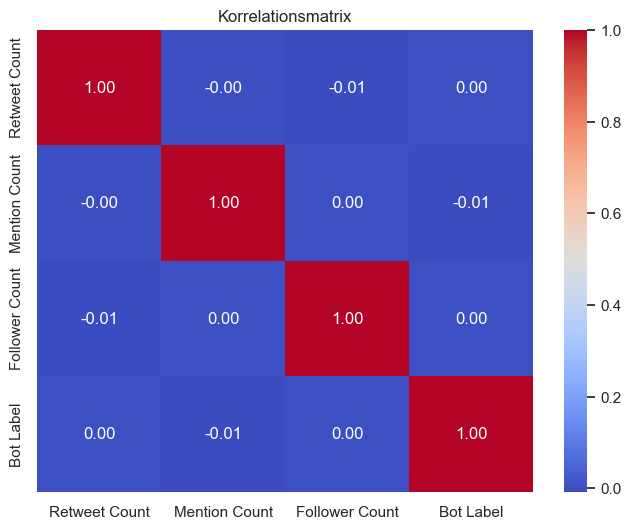

In [9]:
# Auswahl numerischer Spalten für die Korrelation
corr_cols = ["Retweet Count", "Mention Count", "Follower Count", "Bot Label"]
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix")
plt.show()


### 7. Zeitreihenanalyse

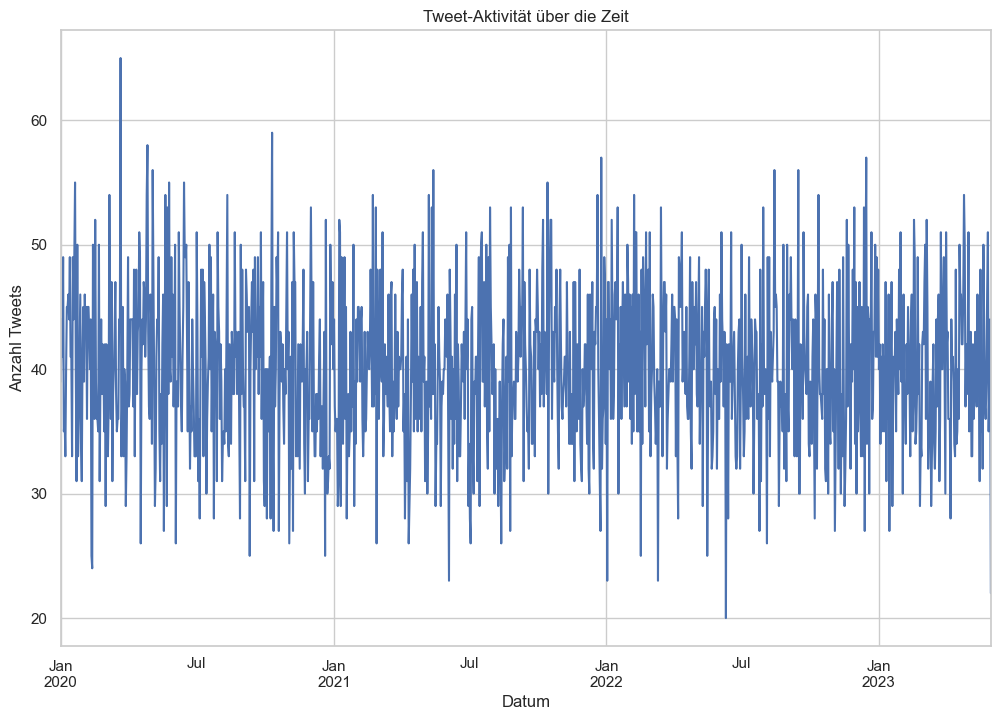

In [11]:
# Analyse der Tweet-Aktivität über die Zeit
if "Created At" in df.columns:
    df["Created At"] = pd.to_datetime(df["Created At"])
    df_sorted = df.sort_values("Created At")
    tweets_per_day = df_sorted.set_index("Created At").resample("D").size()
    plt.figure()
    tweets_per_day.plot()
    plt.title("Tweet-Aktivität über die Zeit")
    plt.xlabel("Datum")
    plt.ylabel("Anzahl Tweets")
    plt.show()

### 8. Textanalyse – Word Cloud der Tweets

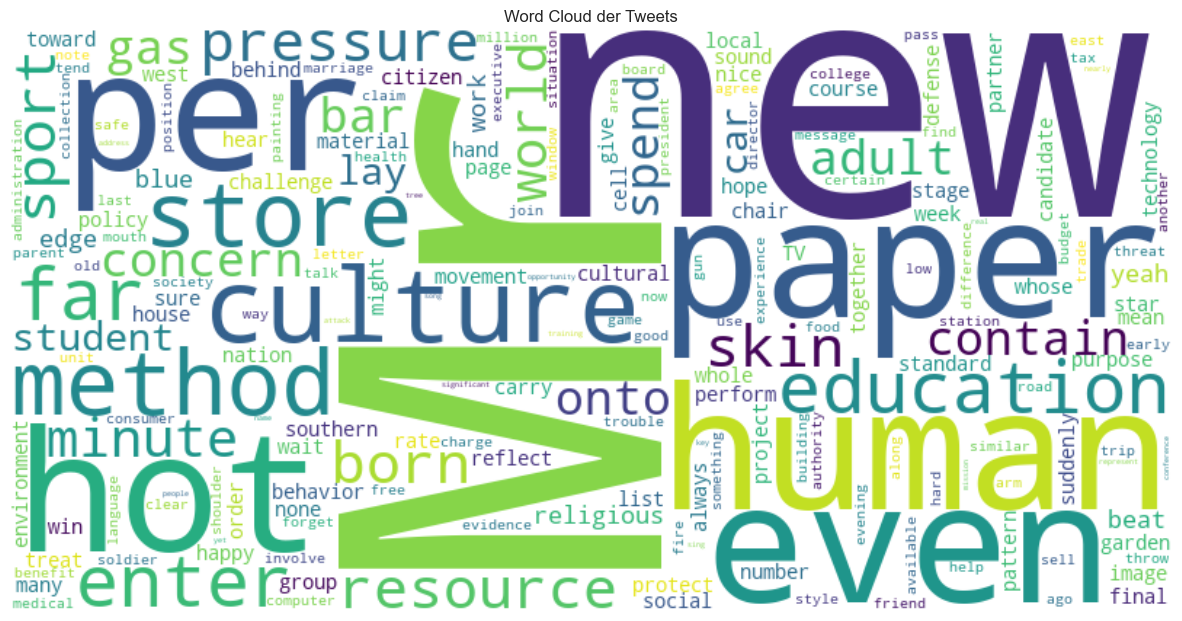

In [12]:
# Alle Tweets zu einem langen String zusammenfügen
all_tweets = " ".join(tweet for tweet in df["Tweet"].dropna())

# Stopwords definieren (ggf. um zusätzliche Wörter erweitern)
stopwords = set(STOPWORDS)
stopwords = stopwords.union({"https", "co", "RT"})

# Word Cloud generieren
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=200, width=800, height=400).generate(all_tweets)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud der Tweets")
plt.show()


### 9. Analyse der Hashtags

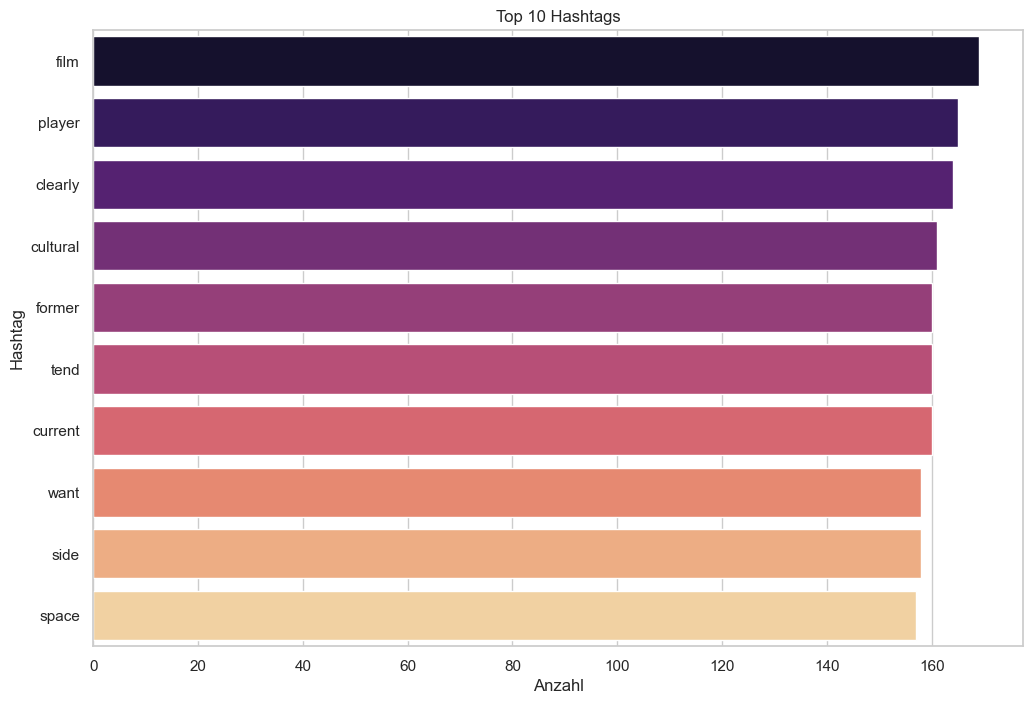

In [13]:
# Annahme: 'Hashtags' enthält eine Zeichenkette mit Hashtags, getrennt durch Kommas oder Leerzeichen.
if "Hashtags" in df.columns:
    df_hashtags = df["Hashtags"].dropna().str.split(r"[,\s]+").explode()
    top_hashtags = df_hashtags.value_counts().nlargest(10)
    
    plt.figure()
    sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette="magma")
    plt.title("Top 10 Hashtags")
    plt.xlabel("Anzahl")
    plt.ylabel("Hashtag")
    plt.show()

### 10. EDA mit spaCy

**In diesem Abschnitt nutzen wir spaCy, um eine tiefere linguistische Analyse der Tweet-Texte durchzuführen. Wir betrachten:**
- **Named Entity Recognition (NER):** Welche Entitätstypen (z.B. PERSON, ORG, GPE) kommen in den Tweets vor?
- **Part-of-Speech (POS) Analyse:** Welche Wortarten (z.B. Noun, Verb, Adjective) dominieren in den Tweets?

**Hinweis: Wir verarbeiten einen zufälligen Sample der Tweets (bis zu 1000 Dokumente), um die Analyse in einem überschaubaren Rahmen zu halten.**

In [14]:
import spacy
from collections import Counter

# spaCy Modell laden (hier das englische Modell; passe ggf. an, falls deine Daten eine andere Sprache haben)
nlp = spacy.load("en_core_web_sm")

# Auswahl eines Samples (bis zu 1000 Tweets) für die Analyse
tweets_nonnull = df["Tweet"].dropna()
sample_size = min(1000, tweets_nonnull.shape[0])
tweets_sample = tweets_nonnull.sample(sample_size, random_state=42)

### 10.1 Named Entity Recognition (NER)
 
**Wir extrahieren Named Entities aus den Tweets und analysieren, welche Entitätstypen am häufigsten vorkommen.**

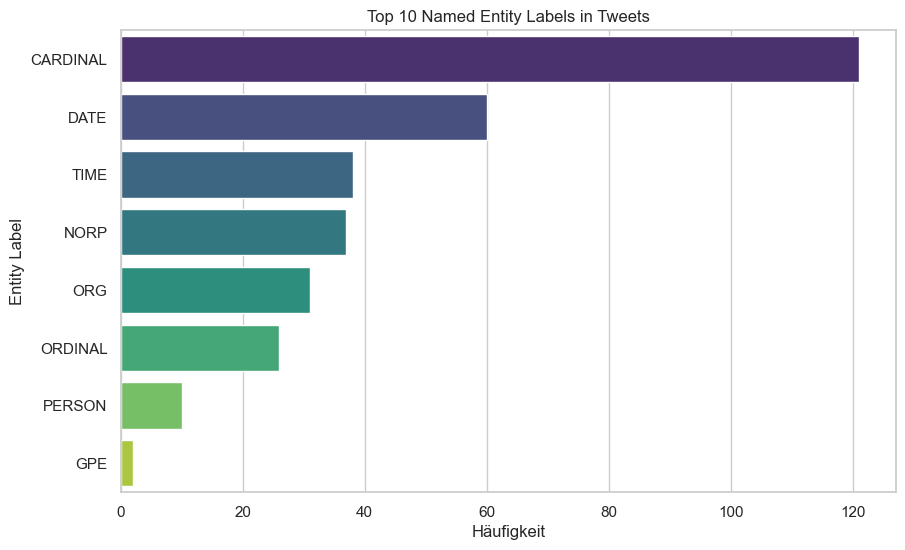

In [15]:
all_entities = []
for doc in nlp.pipe(tweets_sample, batch_size=50):
    all_entities.extend([(ent.text, ent.label_) for ent in doc.ents])

# Zähle, wie oft jeder Entitätstyp (Label) vorkommt
entity_labels = [label for _, label in all_entities]
entity_label_counts = Counter(entity_labels)

# Visualisierung der Top 10 Entity Labels
labels, counts = zip(*entity_label_counts.most_common(10))
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(labels), palette="viridis")
plt.title("Top 10 Named Entity Labels in Tweets")
plt.xlabel("Häufigkeit")
plt.ylabel("Entity Label")
plt.show()

In [16]:
# Zeige die Top 10 häufigsten spezifischen Entities (Text)
entity_text_counter = Counter([text for text, _ in all_entities])
top_entities = entity_text_counter.most_common(10)
print("Top 10 spezifische Entities (Text):")
for entity, count in top_entities:
    print(f"{entity}: {count}")

Top 10 spezifische Entities (Text):
Congress: 17
seven: 14
five: 12
tonight: 11
Democrat: 10
American: 10
three: 10
two: 10
Republican: 10
eight: 9


### 10.2 Part-of-Speech (POS) Analyse

**Hier untersuchen wir, welche Wortarten in den Tweets vorherrschen. Dabei ignorieren wir Satzzeichen.**

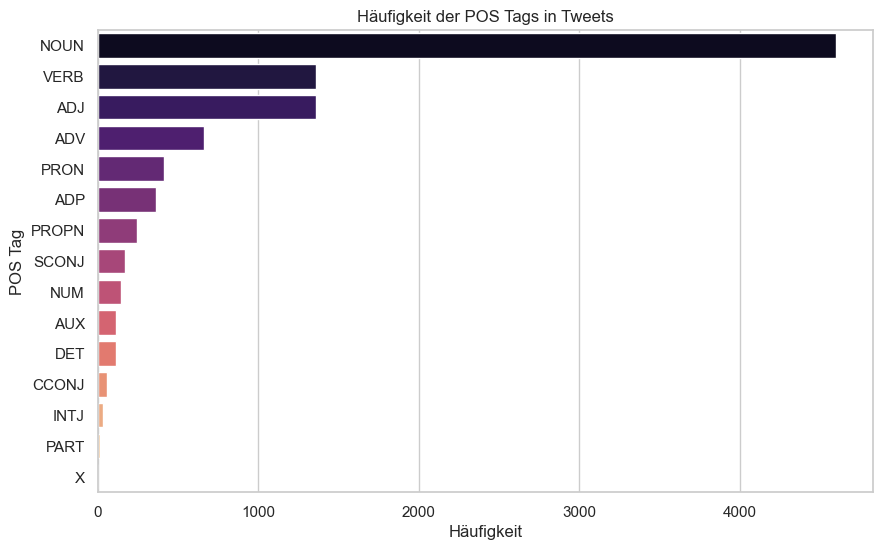

In [17]:
pos_counts = Counter()
for doc in nlp.pipe(tweets_sample, batch_size=50):
    pos_counts.update([token.pos_ for token in doc if not token.is_punct])

# Visualisierung der POS-Tags
pos_labels, pos_freqs = zip(*pos_counts.most_common())
plt.figure(figsize=(10, 6))
sns.barplot(x=list(pos_freqs), y=list(pos_labels), palette="magma")
plt.title("Häufigkeit der POS Tags in Tweets")
plt.xlabel("Häufigkeit")
plt.ylabel("POS Tag")
plt.show()

## **Fazit:**  

Die durchgeführte Exploratory Data Analysis liefert einen tiefgehenden Einblick in die Struktur und Eigenschaften des Datensatzes. Wir konnten die grundlegende Verteilung und die statistischen Kennzahlen der numerischen Variablen wie Retweet Count, Mention Count und Follower Count erfassen sowie Unterschiede zwischen Bots und echten Nutzern anhand des Bot Labels erkennen. Die Analyse der fehlenden Werte und der Zeitreihen zeigt sowohl die Datenqualität als auch die zeitliche Dynamik der Tweet-Aktivitäten auf. Durch die Visualisierungen mit Word Clouds und die detaillierte Untersuchung der Hashtags konnten zudem thematische Schwerpunkte und typische Inhalte identifiziert werden. Ergänzend dazu bietet die spaCy-basierte linguistische Analyse zusätzliche Einblicke in die inhaltliche Struktur der Tweets – insbesondere durch Named Entity Recognition und Part-of-Speech-Analysen – was dabei hilft, relevante Entitäten und sprachliche Muster zu erkennen. Insgesamt schafft diese umfassende EDA eine solide Basis, um weitere Modellierungsschritte und gezielte Bot-Erkennungsansätze zu entwickeln.
